### Fitting Nelson-Siegel Model to US Treasury Yield Curve

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Data

US Daily Treasury Par Yield Curve Rates as of 07/22/2025.

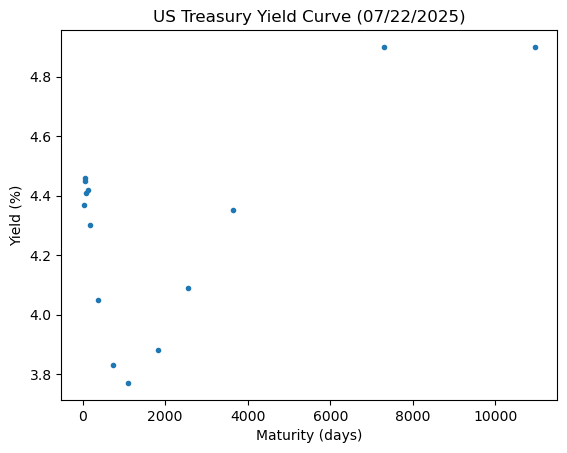

In [48]:
x = np.array([
    1 * 30.44,         # 1 Mo
    1.5 * 30.44,       # 1.5 Mo
    2 * 30.44,         # 2 Mo
    3 * 30.44,         # 3 Mo
    4 * 30.44,         # 4 Mo
    6 * 30.44,         # 6 Mo
    1 * 365.25,        # 1 Yr
    2 * 365.25,        # 2 Yr
    3 * 365.25,        # 3 Yr
    5 * 365.25,        # 5 Yr
    7 * 365.25,        # 7 Yr
    10 * 365.25,       # 10 Yr
    20 * 365.25,       # 20 Yr
    30 * 365.25        # 30 Yr
])

y = np.array([4.37, 4.46, 4.45, 4.41, 4.42, 4.30, 4.05, 3.83, 3.77,
                      3.88, 4.09, 4.35, 4.90, 4.90])

plt.plot(x, y, '.');
plt.xlabel('Maturity (days)')
plt.ylabel('Yield (%)')
plt.title('US Treasury Yield Curve (07/22/2025)');

### 2. Model

Nelson-Siegel model.

In [49]:
def nelson_siegel(t, betas, tau):
    assert len(betas) == 3, "Betas must be a list of three elements."
    return (
        betas[0]
        + betas[1] * (1 - np.exp(-t / tau)) / (t / tau)
        + betas[2] * ((1 - np.exp(-1 * t / tau)) / (t / tau) - np.exp(-1 * t / tau))
    )

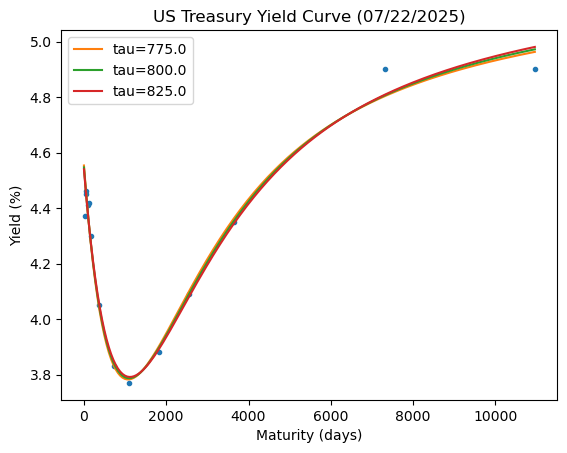

In [50]:
taus = np.linspace(775, 825, 3)

plt.plot(x, y, '.');
plt.xlabel('Maturity (days)')
plt.ylabel('Yield (%)')
plt.title('US Treasury Yield Curve (07/22/2025)')

models = []

for tau in taus:
    X = []
    for xi in x:
        X.append(np.array([
            1,
            (1 - np.exp(-1 * xi / tau)) / (xi / tau),
            ((1 - np.exp(-1 * xi / tau)) / (xi / tau) - np.exp(-1 * xi / tau))
        ]))

    fit = np.linalg.lstsq(X, y)
    models.append(fit)
    betas = fit[0]

    x_test = np.linspace(1, 30 * 365.25, 200)
    plt.plot(x_test, nelson_siegel(x_test, betas, tau), label=f'tau={tau}');
    plt.legend();

### 3. Goodness of Fit

Coefficient of determination: $R^2$; 
Mean Squared Error: MSE

In [51]:
results = {}

for tau, model in zip(taus, models):
    betas = model[0]
    residuals = y - nelson_siegel(x, betas, tau)
    mse = np.mean(residuals**2)
    r_squared = 1 - (np.sum(residuals**2) / np.sum((y - np.mean(y))**2))
    
    results[tau] = {
        'mse': mse,
        'r_squared': np.round(r_squared, 4) * 100 
    }

results = pd.DataFrame.from_dict(results, orient='index').sort_values(by='r_squared', ascending=False)
results.index.name = 'Tau'
print(results)

            mse  r_squared
Tau                       
800.0  0.002756      97.57
825.0  0.002754      97.57
775.0  0.002841      97.49
